In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

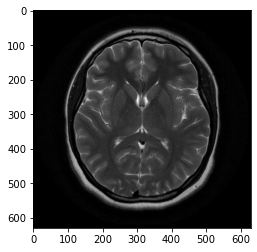

In [34]:

CATEGORIES = ['no', 'yes']

for categories in CATEGORIES:
    path = os.path.join("training", categories)   # path to yes or no dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap='gray')
        plt.show()
        break
    break

In [5]:
img_array.shape

(630, 630)

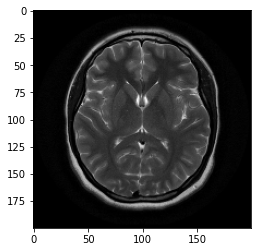

In [6]:
IMG_SIZE = 200

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [7]:
DATADIR = "training"
DATADIR_TEST = "testing"
CATEGORIES = ['no', 'yes']

training_data = []
testing_data = []


def creat_training_data():
    for categories in CATEGORIES:
        path = os.path.join(DATADIR, categories)   # path to yes or no dir
        class_num = CATEGORIES.index(categories)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass


def creat_testing_data():
    for categories in CATEGORIES:
        path_test = os.path.join(DATADIR_TEST, categories)   # path to yes or no dir
        class_num_test = CATEGORIES.index(categories)
        for img in os.listdir(path_test):
            try:
                img_array_test = cv2.imread(os.path.join(path_test, img), cv2.IMREAD_GRAYSCALE)
                new_array_test = cv2.resize(img_array_test, (IMG_SIZE, IMG_SIZE))
                testing_data.append([new_array_test, class_num_test])
            except Exception as e:
                pass


creat_training_data()
creat_testing_data()

In [29]:
import random

random.shuffle(training_data)
random.shuffle(testing_data)

In [26]:
print(len(training_data))
print(len(testing_data))

430
53


In [39]:
training_data[:1]

[[array([[164,   1,  23, ...,  22,  22,  22],
         [164,   1,  23, ...,  22,  22,  22],
         [164,   1,  23, ...,  22,  22,  22],
         ...,
         [165,   1,  24, ...,  21,  21,  21],
         [165,   1,  24, ...,  21,  21,  21],
         [165,   1,  24, ...,  22,  22,  22]], dtype=uint8),
  0]]

In [38]:
testing_data[:1]

[[array([[254, 254, 255, ..., 255, 255, 255],
         [253, 249, 250, ..., 254, 254, 255],
         [254, 148,  11, ..., 253, 254, 254],
         ...,
         [253, 148,  15, ..., 253, 254, 255],
         [250, 186, 107, ..., 252, 254, 255],
         [252, 251, 254, ..., 255, 255, 255]], dtype=uint8),
  1]]

In [15]:
X_train_full = []
y_train_full = []

for feature, label in training_data:
    X_train_full.append(feature)
    y_train_full.append(label) 
    
X_train_full = np.array(X_train_full).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


X_test = []
y_test = []

for feature, label in testing_data:
    X_test.append(feature)
    y_test.append(label)
    
X_test = np.array(X_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [23]:
import pickle

pickle_out = open("X_train_full.pickle", "wb")
pickle.dump(X_train_full, pickle_out)
pickle_out.close()

pickle_out = open("y_train_full.pickle", "wb")
pickle.dump(y_train_full, pickle_out)
pickle_out.close()

pickle_out = open("X_test.pickle", "wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out = open("y_test.pickle", "wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()